# US-India YouTube 2021 Trending Video Comparison (Part 2)

pennkey: yujingzh

## Importing Packages and Configurations

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
import re
from collections import Counter


In [7]:
def plot_conf(ax, xlbl='', ylbl='', t='', back_color='#ffffff',
              text_color='#616161', grid_color='#e9e9e9', 
              tick_color='', ticklbl_size=9, lbl_size=11, lang='en'):
    """
    This function perform operations to produce better-looking 
    visualizations
    """
    # changing the background color of the plot
    ax.set_facecolor(back_color)
    # modifying the ticks on plot axes
    ax.tick_params(axis='both', labelcolor=text_color, color=back_color)
    if tick_color != '':
        ax.tick_params(axis='both', color=tick_color)
    ax.tick_params(axis='both', which='major', labelsize=ticklbl_size)
    # adding a grid and specifying its color
    ax.grid(True, color=grid_color)
    # making the grid appear behind the graph elements
    ax.set_axisbelow(True)
    # hiding axes
    ax.spines['bottom'].set_color(back_color)
    ax.spines['top'].set_color(back_color) 
    ax.spines['right'].set_color(back_color)
    ax.spines['left'].set_color(back_color)
    # setting the title, x label, and y label of the plot
    if lang == 'ar':
        ax.set_title(get_display(reshaper.reshape(t)), fontweight='bold', family='Amiri',
                     fontsize=14, color=text_color, loc='right', pad=24);
        ax.set_xlabel(get_display(reshaper.reshape(xlbl)), fontweight='bold', family='Amiri',
                      labelpad=16, fontsize=lbl_size, color=text_color, fontstyle='italic');
        ax.set_ylabel(get_display(reshaper.reshape(ylbl)), fontweight='bold', family='Amiri',
                      color=text_color, labelpad=16, fontsize=lbl_size, fontstyle='italic');
    else:
        ax.set_title(t, fontsize=14, color='#616161', loc='left', pad=24, fontweight='bold');
        ax.set_xlabel(xlbl, labelpad=16, fontsize=lbl_size, color='#616161', fontstyle='italic');
        ax.set_ylabel(ylbl, color='#616161', labelpad=16, fontsize=lbl_size, fontstyle='italic');

us_col = '#011F5B'

india_col='#990000'

## Reading and Combining Datasets

In [2]:
# create dataframe
us = pd.read_csv('US_youtube_trending_data.csv')
india = pd.read_csv('IN_youtube_trending_data.csv')
us_category = pd.read_csv('us_category_df.csv')
in_category = pd.read_csv('in_category_df.csv')

In [3]:
# choose data in 2021
us['trending_date'] = pd.to_datetime(us['trending_date'])
us.sort_values(by='trending_date', ascending=True, inplace=True)
us = us[(us['trending_date'] >= '2021-01-01') & (us['trending_date'] <= '2021-12-31')]
us.reset_index(drop=True, inplace=True)

india['trending_date'] = pd.to_datetime(india['trending_date'])
india.sort_values(by='trending_date', ascending=True, inplace=True)
india = india[(india['trending_date'] >= '2021-01-01') & (india['trending_date'] <= '2021-12-31')]
india.reset_index(drop=True, inplace=True)

In [4]:
# match category ids with their names
us_full=us.merge(us_category,how='left',left_on='categoryId',right_on='id')
us_full.rename(columns={'title_y':'category',
            'title_x':'title'},inplace=True)
us_full.drop('id',axis=1,inplace=True)
in_full=india.merge(in_category,how='left',left_on='categoryId',right_on='id')
in_full.rename(columns={'title_y':'category',
            'title_x':'title'},inplace=True)
in_full.drop('id',axis=1,inplace=True)

In [5]:
# drop dulicate videos
us1 = pd.DataFrame(us_full.groupby('title').sum())#.reset_index(inplace=True)
us1.reset_index(inplace=True)
us1.drop(['categoryId','comments_disabled','ratings_disabled'],axis=1,inplace=True)
us_single = us1.merge(us_full.loc[:,['tags','trending_date','video_id','title','categoryId','channelTitle','category']],how='left',on='title')
us_single.drop_duplicates(subset = 'title', keep = 'first',inplace=True)

in1 = pd.DataFrame(in_full.groupby('title').sum())#.reset_index(inplace=True)
in1.reset_index(inplace=True)
in1.drop(['categoryId','comments_disabled','ratings_disabled'],axis=1,inplace=True)
in_single = in1.merge(in_full.loc[:,['tags','trending_date','video_id','title','categoryId','channelTitle','category']],how='left',on='title')
in_single.drop_duplicates(subset = 'title', keep = 'first',inplace=True)

## Sub-task 1: What is the distribution of trending video categories and channels in the US? What are the top 5 categories and top 10 channels? 


## Sub-task 2:What is the distribution of trending video categories and channels in India? What are the top 5 categories and top 10 channels? How are they different from those in the US?

### Category

#### US

In [22]:
# top 5 gategories in US 
us_category_count = pd.DataFrame(us_single.groupby('category').size().sort_values(ascending=False))
us_category_count.reset_index(inplace=True)
us_category_count['percentage'] = (us_category_count[0]/us_category_count[0].sum())*100
us_category_count
# top 5: Entertainment; Gaming; Music; Sports; People & Blogs

,category,0,percentage
0,Gaming,2534,20.581546
1,Entertainment,2469,20.053606
2,Music,1932,15.692008
3,Sports,1407,11.427875
4,People & Blogs,1102,8.950617
5,Comedy,642,5.214425
6,News & Politics,468,3.801170
7,Film & Animation,446,3.622482
8,Science & Technology,384,3.118908
9,Howto & Style,315,2.558480


In [23]:
sum_us=0
for i in range(5):
  sum_us+=us_category_count.at[i,'percentage']
print(sum_us)


76.7056530214425


[None, None]

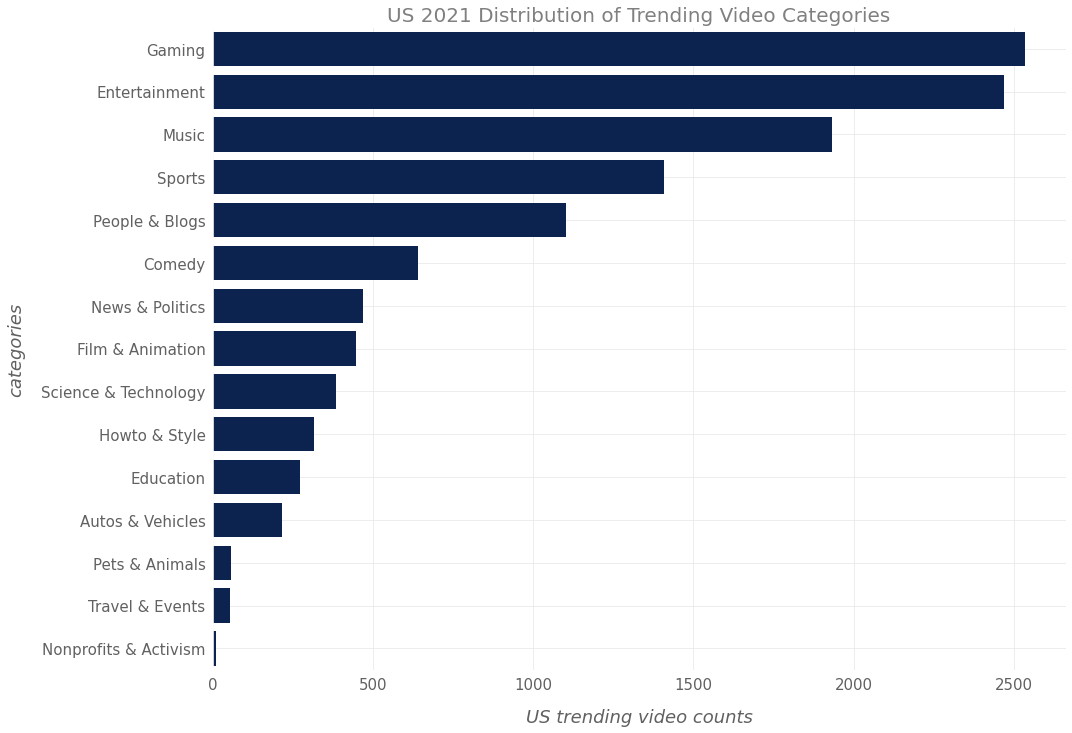

In [34]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=0, y="category", data=us_category_count,color=us_col, ax=ax);
plot_conf(ax, xlbl='US trending video counts', ylbl='categories', ticklbl_size=15, lbl_size=18)
plt.tight_layout()
title_obj=plt.title('US 2021 Distribution of Trending Video Categories',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 

[None, None]

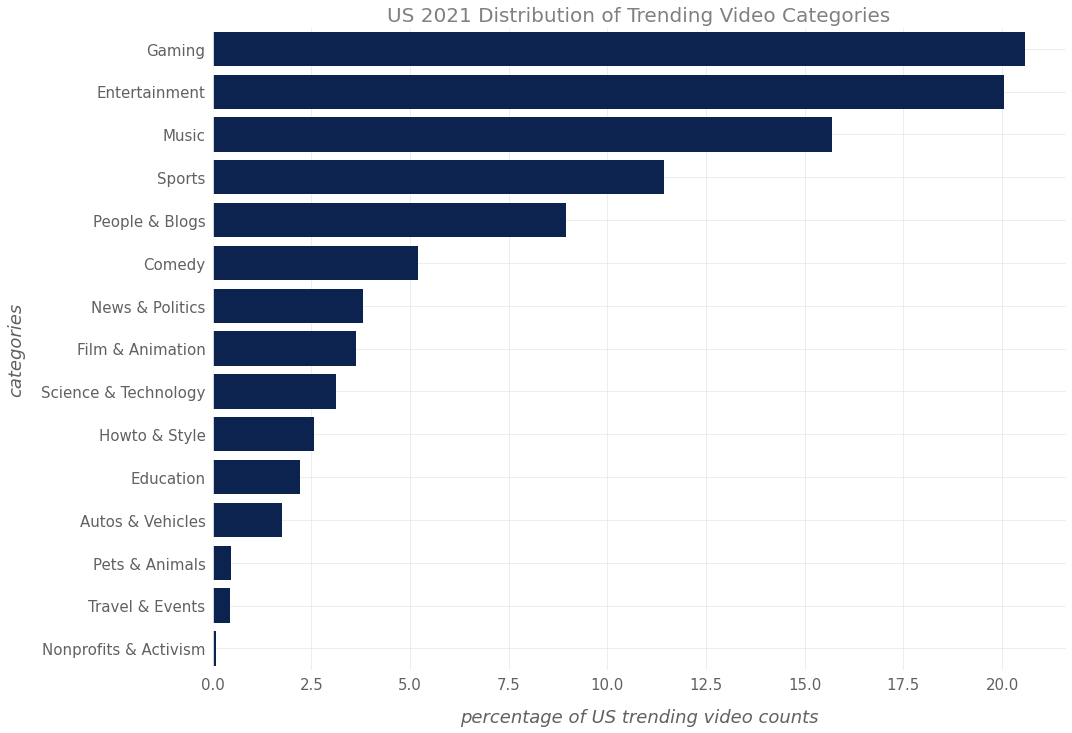

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x='percentage', y="category", data=us_category_count,color=us_col, ax=ax);
plot_conf(ax, xlbl='percentage of US trending video counts', ylbl='categories', ticklbl_size=15, lbl_size=18)
plt.tight_layout()
title_obj=plt.title('US 2021 Distribution of Trending Video Categories',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 

#### India

In [37]:
# top 5 gategories in India 
in_category_count = pd.DataFrame(in_single.groupby('category').size().sort_values(ascending=False))
in_category_count.reset_index(inplace=True)
in_category_count['percentage'] = (in_category_count[0]/in_category_count[0].sum())*100
in_category_count
# top 5: Entertainment; People & Blogs; Music; Comedy; Gaming

,category,0,percentage
0,Entertainment,8328,43.485980
1,People & Blogs,2542,13.273458
2,Music,2345,12.244791
3,Comedy,1158,6.046682
4,Gaming,901,4.704715
5,Science & Technology,741,3.869250
6,Sports,707,3.691713
7,News & Politics,674,3.519398
8,Howto & Style,590,3.080779
9,Education,560,2.924129


In [38]:
sum_in=0
for i in range(5):
  sum_in+=in_category_count.at[i,'percentage']
print(sum_in)

79.75562633805023


[None, None]

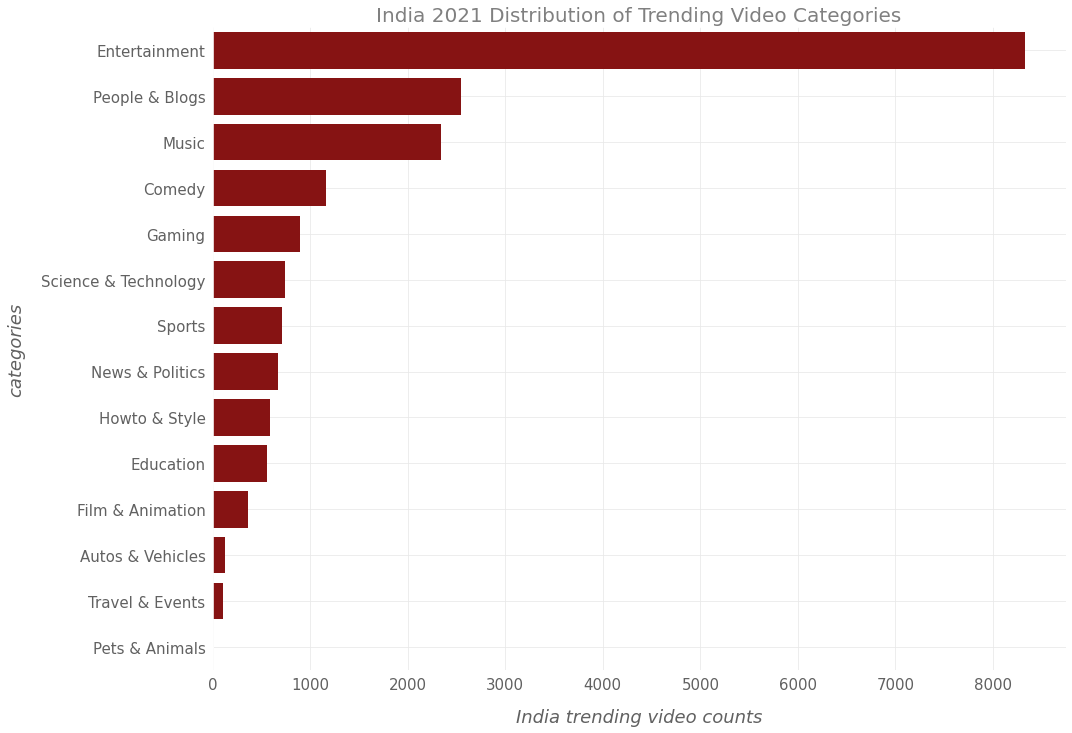

In [39]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=0, y="category", data=in_category_count,color=india_col, ax=ax);
plot_conf(ax, xlbl='India trending video counts', ylbl='categories', ticklbl_size=15, lbl_size=18)
plt.tight_layout()
title_obj=plt.title('India 2021 Distribution of Trending Video Categories',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 

[None, None]

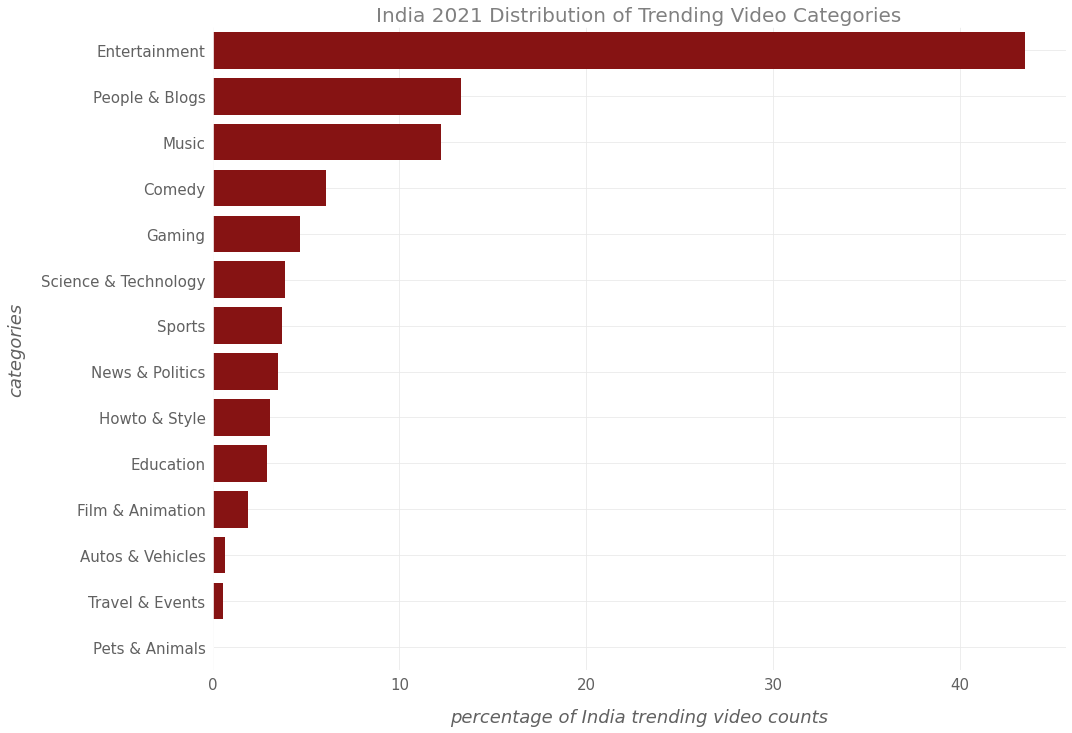

In [41]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x='percentage', y="category", data=in_category_count,color=india_col, ax=ax);
plot_conf(ax, xlbl='percentage of India trending video counts', ylbl='categories', ticklbl_size=15, lbl_size=18)
plt.tight_layout()
title_obj=plt.title('India 2021 Distribution of Trending Video Categories',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 

### Channel

#### US

[None, None]

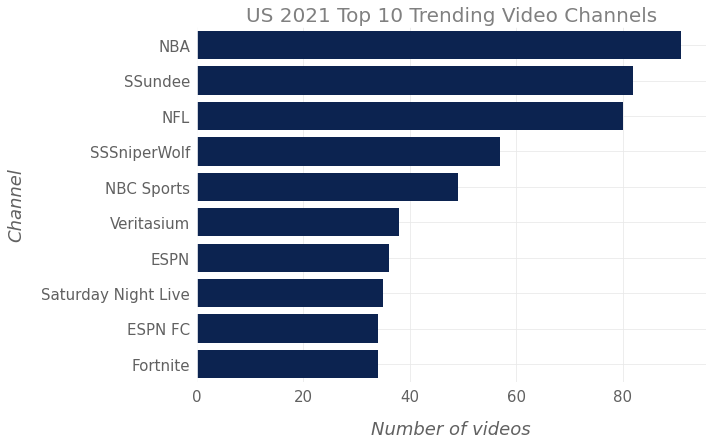

In [28]:
# US top 10 channels
channels_us= us_single.groupby('channelTitle').size().sort_values(ascending=False).reset_index(name='video_count').head(10)
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x="video_count", y="channelTitle", data=channels_us, color=us_col, ax=ax);
plot_conf(ax, xlbl='Number of videos', ylbl='Channel', ticklbl_size=15, lbl_size=18)
plt.tight_layout()
title_obj=plt.title('US 2021 Top 10 Trending Video Channels',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 

In [15]:
# number of trending channels in top 5 categories US
dic_us={}
for i in ['Entertainment','Music','Sports','Gaming','People & Blogs']:
  dic_us[i]=len(us_single[us_single['category']==i].groupby('channelTitle'))
dic_us_df= pd.DataFrame.from_dict(dic_us,orient='index',columns=['number of channels']).reset_index().rename(columns={'index':'category'}).sort_values('number of channels',ascending=False)
dic_us_df

,category,number of channels
3,Gaming,800
0,Entertainment,769
1,Music,732
4,People & Blogs,443
2,Sports,294


[None, None]

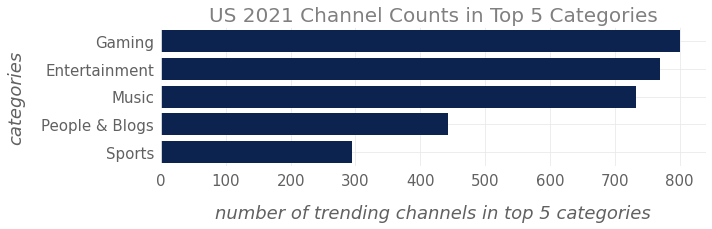

In [30]:
fig, ax = plt.subplots(figsize=(10,3))
sns.barplot(x='number of channels', y="category", data=dic_us_df,color=us_col, ax=ax);
plot_conf(ax, xlbl='number of trending channels in top 5 categories', ylbl='categories', ticklbl_size=15, lbl_size=18)
plt.tight_layout()
title_obj=plt.title('US 2021 Channel Counts in Top 5 Categories',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 

#### India

[None, None]

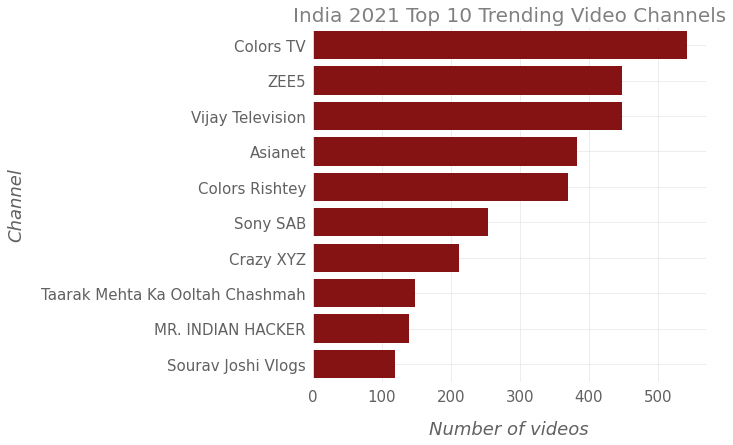

In [31]:
# INDIA
channels_in= in_single.groupby('channelTitle').size().sort_values(ascending=False).reset_index(name='video_count').head(10)
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x="video_count", y="channelTitle", data=channels_in,color=india_col, ax=ax);
plot_conf(ax, xlbl='Number of videos', ylbl='Channel', ticklbl_size=15, lbl_size=18)
plt.tight_layout()
title_obj=plt.title('India 2021 Top 10 Trending Video Channels',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 

In [20]:
# number of trending channels in top 5 categories India
dic_in={}
for i in ['Entertainment','Music','Comedy','Gaming','People & Blogs']:
  dic_in[i]=len(in_single[in_single['category']==i].groupby('channelTitle'))
dic_in_df= pd.DataFrame.from_dict(dic_in,orient='index',columns=['number of channels']).reset_index().rename(columns={'index':'category'}).sort_values('number of channels',ascending=False)
dic_in_df

,category,number of channels
0,Entertainment,820
4,People & Blogs,503
1,Music,424
2,Comedy,176
3,Gaming,140


[None, None]

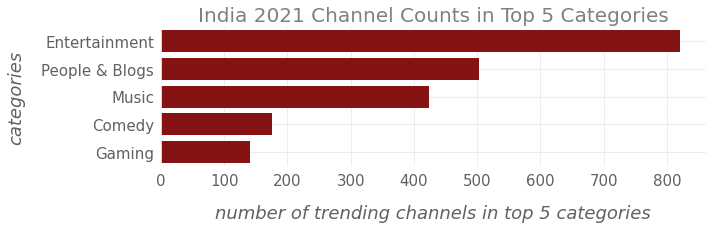

In [33]:
fig, ax = plt.subplots(figsize=(10,3))
sns.barplot(x='number of channels', y="category", data=dic_in_df,color=india_col, ax=ax);
plot_conf(ax, xlbl='number of trending channels in top 5 categories', ylbl='categories', ticklbl_size=15, lbl_size=18)
plt.tight_layout()
title_obj=plt.title('India 2021 Channel Counts in Top 5 Categories',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 

## Sub-Task 6: If we want to create a new channel, how should we design it to boost popularity on YouTube. How we will do it differently in the US and India?


### Title length

C:\Users\alial\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[None, None]

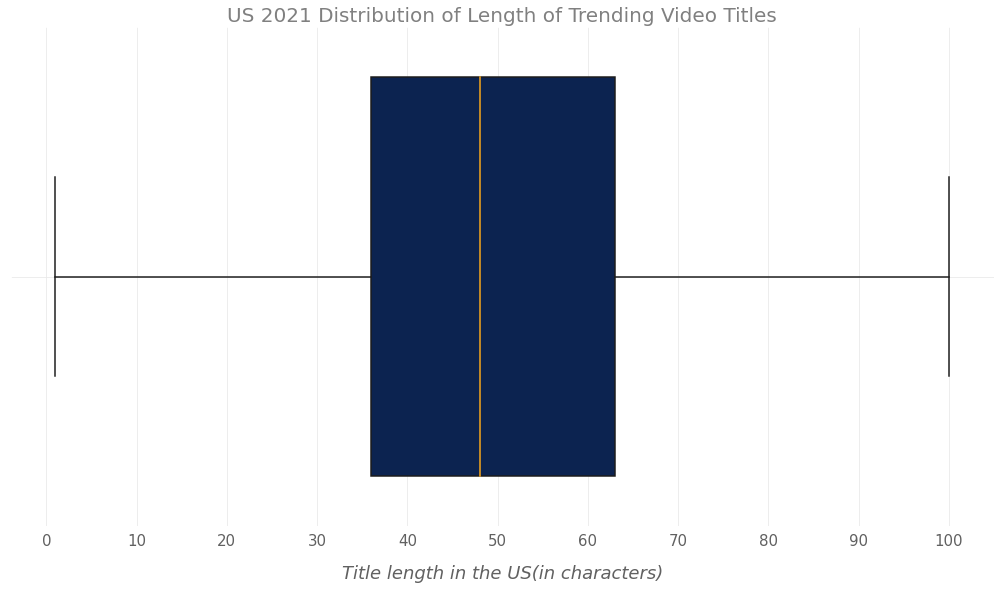

In [43]:
# title length US
title_lengths = us_single["title"].apply(lambda x: len(x))
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(title_lengths, color=us_col, medianprops={'color': '#FBA91A'}, ax=ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plot_conf(ax, xlbl='Title length in the US(in characters)', ticklbl_size=15, lbl_size=18)
plt.tight_layout()
title_obj=plt.title('US 2021 Distribution of Length of Trending Video Titles',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 

C:\Users\alial\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[None, None]

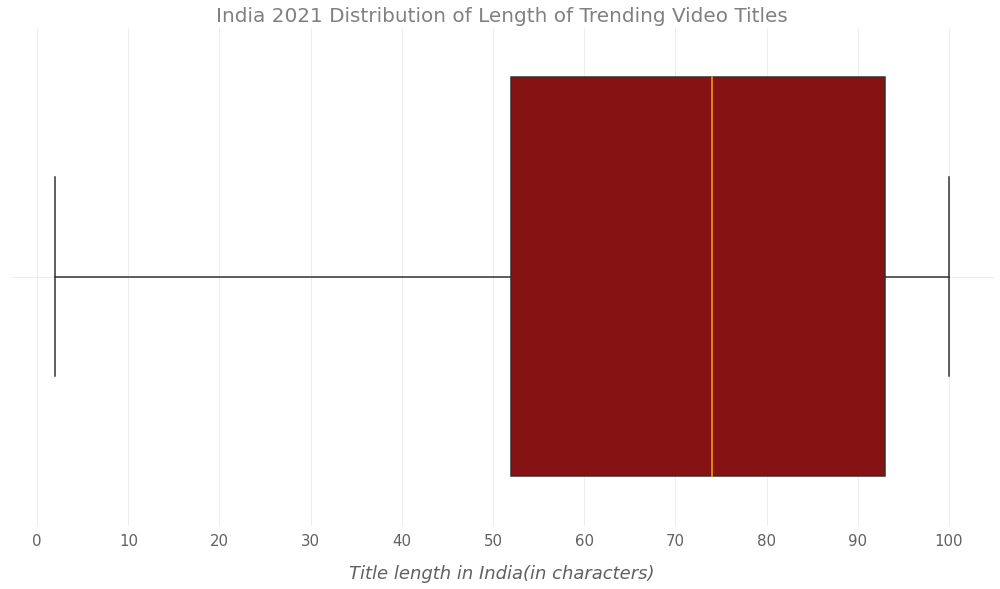

In [45]:
# title length india
title_lengths = in_single["title"].apply(lambda x: len(x))
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(title_lengths, color=india_col, medianprops={'color': '#FBA91A'}, ax=ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plot_conf(ax, xlbl='Title length in India(in characters)', ticklbl_size=15, lbl_size=18)
plt.tight_layout()
title_obj=plt.title('India 2021 Distribution of Length of Trending Video Titles',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 

### Title symbol

In [46]:
all_titles_us = ' '.join([x.lower() for x in us_single['title']])
title_symbols_us = re.sub(r'\w', '', all_titles_us)
title_symbols_us = re.sub(r'\s', '', title_symbols_us)
title_symbols_us = list(title_symbols_us)
Counter(title_symbols_us).most_common(10)

[('.', 3928),
 ('-', 3750),
 ('|', 3367),
 ('(', 2809),
 (')', 2806),
 ('!', 2746),
 ("'", 1968),
 (',', 1659),
 (':', 1317),
 ('#', 893)]

In [47]:
all_titles_in = ' '.join([x.lower() for x in in_single['title']])
title_symbols_in = re.sub(r'\w', '', all_titles_in)
title_symbols_in = re.sub(r'\s', '', title_symbols_in)
title_symbols_in = list(title_symbols_in)
Counter(title_symbols_in).most_common(10)

[('|', 35255),
 ('ा', 8353),
 ('്', 7994),
 ('-', 7153),
 ('ി', 4095),
 ('े', 3948),
 ('.', 3675),
 ('#', 3656),
 ('्', 3296),
 ('ी', 3198)]

### Tags 

In [48]:
us_tag=us_single['tags'].apply(lambda x : x.split('|'))

us_tag_dict={}

for x in us_tag:
    for i in x:
        if i in us_tag_dict:
            us_tag_dict[i]+=1
        else:
            us_tag_dict[i]=1

tag_df_us = pd.DataFrame.from_dict(us_tag_dict, orient='index',columns=['counts'])
tag_df_us = tag_df_us.reset_index().rename(columns = {'index':'tag'})
tag_df_us.sort_values('counts',ascending=False,inplace=True)
tag_df_us.to_csv('tagcounts_us.csv')

In [49]:
in_tag=in_single['tags'].apply(lambda x : x.split('|'))

in_tag_dict={}

for x in in_tag:
    for i in x:
        if i in in_tag_dict:
            in_tag_dict[i]+=1
        else:
            in_tag_dict[i]=1
            
tag_df_in = pd.DataFrame.from_dict(in_tag_dict, orient='index',columns=['counts'])
tag_df_in = tag_df_in.reset_index().rename(columns = {'index':'tag'})
tag_df_in.sort_values('counts',ascending=False,inplace=True)
tag_df_in.to_csv('tagcounts_in.csv')